In [279]:
# Imports

import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline


In [2]:
path = 'C:/Users/Cesar Hooper/Desktop/github/proyecto_POZO'
os.listdir(path)

['.ipynb_checkpoints',
 'Case Técnico .pdf',
 'dados_pocos.csv',
 'Mathematical_Geology_1994.pdf',
 'scielo_pozos_correlacionados.pdf',
 'ScienceDirect_articles_15Sep2022_13-12-46.386.zip',
 'Untitled.ipynb']

In [3]:
dataset = pd.read_csv(path + '/dados_pocos.csv')

In [4]:
dataset

,Unnamed: 0,Nome do Poço,Fase,Tipo Poço,LDA (Lâmina D'Água),Diâmetro Fase,Metragem,NFases
0,0,6C5G4M,1,VERTICAL,598.0,26,607.0,4
1,1,6C5G4M,2,VERTICAL,598.0,17 1/2,1306.0,4
2,2,6C5G4M,3,VERTICAL,598.0,12 1/4,1201.0,4
3,3,6C5G4M,4,VERTICAL,598.0,8 1/2,1445.0,4
4,4,8030JC,1,VERTICAL,0.0,17 1/2,410.0,3
...,...,...,...,...,...,...,...,...
10644,10644,E25RS3,1,0,0.0,30,60.0,1
10645,10645,AR3826,1,0,0.0,30,50.0,1
10646,10646,XO8Q23,1,0,1282.0,36,56.0,1
10647,10647,7RK405,1,0,0.0,26,49.0,1


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10649 entries, 0 to 10648
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10649 non-null  int64  
 1   Nome do Poço         10649 non-null  object 
 2   Fase                 10649 non-null  int64  
 3   Tipo Poço            10649 non-null  object 
 4   LDA (Lâmina D'Água)  10649 non-null  float64
 5   Diâmetro Fase        10649 non-null  object 
 6   Metragem             10649 non-null  float64
 7   NFases               10649 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 665.7+ KB


In [17]:
dataset.describe()

,Unnamed: 0,Fase,LDA (Lâmina D'Água),Metragem,NFases
count,10649.000000,10649.000000,10649.000000,10649.000000,10649.000000
mean,5324.000000,2.666448,1105.844333,678.043877,4.295709
std,3074.245842,1.537327,733.541670,564.198821,1.988411
min,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2662.000000,1.000000,444.000000,178.000000,3.000000
50%,5324.000000,2.000000,1091.000000,604.000000,4.000000
75%,7986.000000,4.000000,1730.000000,1026.000000,5.000000
max,10648.000000,8.000000,2988.000000,4040.000000,22.000000


In [5]:
columnas = ['unnamed', 'name', 'fase', 'hole_type', 'lda', 'fase_diameter', 'metragen', 'n_fase'];
dataset.columns = columnas

In [6]:
dataset.head()

,unnamed,name,fase,hole_type,lda,fase_diameter,metragen,n_fase
0,0,6C5G4M,1,VERTICAL,598.0,26,607.0,4
1,1,6C5G4M,2,VERTICAL,598.0,17 1/2,1306.0,4
2,2,6C5G4M,3,VERTICAL,598.0,12 1/4,1201.0,4
3,3,6C5G4M,4,VERTICAL,598.0,8 1/2,1445.0,4
4,4,8030JC,1,VERTICAL,0.0,17 1/2,410.0,3


In [7]:
dataset = dataset.drop(['unnamed'], axis=1)

In [8]:
# arreglo con los tipos de perforaciones
dataset['hole_type'].unique()

array(['VERTICAL', 'DIRECIONAL', '0', 'HORIZONTAL'], dtype=object)

In [63]:
dataset[dataset['hole_type'] == tipos[3]]

,name,fase,hole_type,lda,fase_diameter,metragen,n_fase
1177,GM2626,1,HORIZONTAL,328.0,8 1/2,780.0,1
1178,G363U2,1,HORIZONTAL,330.0,8 1/2,784.0,1
2194,P1SA39,1,HORIZONTAL,1323.0,12 1/4,843.0,2
2195,P1SA39,2,HORIZONTAL,1323.0,8 1/2,334.0,2
2196,7ABC53,1,HORIZONTAL,1323.0,8 1/2,1076.0,1
...,...,...,...,...,...,...,...
10103,4WW4ZT,2,HORIZONTAL,469.0,5 1/2,0.0,2
10514,D06RW4,1,HORIZONTAL,1056.0,17 1/2,1283.0,3
10515,D06RW4,2,HORIZONTAL,1056.0,12 1/4,2435.0,3
10516,D06RW4,3,HORIZONTAL,1056.0,8 1/2,632.0,3


In [58]:
dataset[dataset['fase'] == 2]

,name,fase,hole_type,lda,fase_diameter,metragen,n_fase
1,6C5G4M,2,VERTICAL,598.0,17 1/2,1306.0,4
5,8030JC,2,VERTICAL,0.0,12 1/4,1670.0,3
8,9K474J,2,VERTICAL,134.0,28,995.0,3
11,OYC6AY,2,VERTICAL,1801.0,14 3/4,674.0,7
18,GQH3R4,2,VERTICAL,41.5,17 1/2,509.0,6
...,...,...,...,...,...,...,...
10589,V5P0I7,2,0,0.0,16 1/2,0.0,22
10590,V5P0I7,2,0,0.0,6,0.0,22
10591,V5P0I7,2,0,0.0,8 1/2,0.0,22
10603,G4RU15,2,0,0.0,26,631.0,7


In [161]:
dataset

,name,fase,hole_type,lda,fase_diameter,metragen,n_fase
0,6C5G4M,1,VERTICAL,598.0,26,607.0,4
1,6C5G4M,2,VERTICAL,598.0,17 1/2,1306.0,4
2,6C5G4M,3,VERTICAL,598.0,12 1/4,1201.0,4
3,6C5G4M,4,VERTICAL,598.0,8 1/2,1445.0,4
4,8030JC,1,VERTICAL,0.0,17 1/2,410.0,3
...,...,...,...,...,...,...,...
10644,E25RS3,1,0,0.0,30,60.0,1
10645,AR3826,1,0,0.0,30,50.0,1
10646,XO8Q23,1,0,1282.0,36,56.0,1
10647,7RK405,1,0,0.0,26,49.0,1


In [178]:
# separamos perforaciones Verical y horizontal y
# los concatenamos en un DF
datos_v = dataset[dataset['hole_type'] == 'VERTICAL']
datos_h = dataset[dataset['hole_type']== 'HORIZONTAL']
dataset_reduc = pd.concat([datos_h, datos_v])
dataset_reduc

,name,fase,hole_type,lda,fase_diameter,metragen,n_fase
1177,GM2626,1,HORIZONTAL,328.0,8 1/2,780.0,1
1178,G363U2,1,HORIZONTAL,330.0,8 1/2,784.0,1
2194,P1SA39,1,HORIZONTAL,1323.0,12 1/4,843.0,2
2195,P1SA39,2,HORIZONTAL,1323.0,8 1/2,334.0,2
2196,7ABC53,1,HORIZONTAL,1323.0,8 1/2,1076.0,1
...,...,...,...,...,...,...,...
10512,EKGYYF,4,VERTICAL,2140.0,9,0.0,6
10513,262PE8,1,VERTICAL,2135.0,8 1/2,977.0,1
10522,DH3L81,1,VERTICAL,928.0,8 1/2,539.0,1
10636,V3VYY4,1,VERTICAL,1323.0,36,58.5,1


In [179]:
# tranformacion de los diametros
dataset_reduc['diametros'] = trans_diam(dataset_reduc['fase_diameter'])
dataset_reduc = dataset_reduc.drop(['fase_diameter'], axis=1)
dataset_reduc

,name,fase,hole_type,lda,metragen,n_fase,diametros
1177,GM2626,1,HORIZONTAL,328.0,780.0,1,8.50
1178,G363U2,1,HORIZONTAL,330.0,784.0,1,8.50
2194,P1SA39,1,HORIZONTAL,1323.0,843.0,2,12.25
2195,P1SA39,2,HORIZONTAL,1323.0,334.0,2,8.50
2196,7ABC53,1,HORIZONTAL,1323.0,1076.0,1,8.50
...,...,...,...,...,...,...,...
10512,EKGYYF,4,VERTICAL,2140.0,0.0,6,9.00
10513,262PE8,1,VERTICAL,2135.0,977.0,1,8.50
10522,DH3L81,1,VERTICAL,928.0,539.0,1,8.50
10636,V3VYY4,1,VERTICAL,1323.0,58.5,1,36.00


In [183]:
# transformamos los valores holy_type en formato numérico
# get dummies
dummies = pd.get_dummies(dataset_reduc['hole_type'])
dataset_reduc[['HORIZONTAL', 'VERTICAL']] = dummies

In [186]:
datos_final = dataset_reduc.drop(['hole_type'], axis=1)

In [191]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6686 entries, 1177 to 10637
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        6686 non-null   object 
 1   fase        6686 non-null   int64  
 2   lda         6686 non-null   float64
 3   metragen    6686 non-null   float64
 4   n_fase      6686 non-null   int64  
 5   diametros   6686 non-null   float64
 6   HORIZONTAL  6686 non-null   uint8  
 7   VERTICAL    6686 non-null   uint8  
dtypes: float64(3), int64(2), object(1), uint8(2)
memory usage: 378.7+ KB


In [192]:
datos_final

,name,fase,lda,metragen,n_fase,diametros,HORIZONTAL,VERTICAL
1177,GM2626,1,328.0,780.0,1,8.50,1,0
1178,G363U2,1,330.0,784.0,1,8.50,1,0
2194,P1SA39,1,1323.0,843.0,2,12.25,1,0
2195,P1SA39,2,1323.0,334.0,2,8.50,1,0
2196,7ABC53,1,1323.0,1076.0,1,8.50,1,0
...,...,...,...,...,...,...,...,...
10512,EKGYYF,4,2140.0,0.0,6,9.00,0,1
10513,262PE8,1,2135.0,977.0,1,8.50,0,1
10522,DH3L81,1,928.0,539.0,1,8.50,0,1
10636,V3VYY4,1,1323.0,58.5,1,36.00,0,1


In [203]:
datos

,name,fase,hole_type,lda,fase_diameter,metragen,n_fase
1177,GM2626,1,HORIZONTAL,328.0,8 1/2,780.0,1
1178,G363U2,1,HORIZONTAL,330.0,8 1/2,784.0,1
2194,P1SA39,1,HORIZONTAL,1323.0,12 1/4,843.0,2
2195,P1SA39,2,HORIZONTAL,1323.0,8 1/2,334.0,2
2196,7ABC53,1,HORIZONTAL,1323.0,8 1/2,1076.0,1
...,...,...,...,...,...,...,...
10512,EKGYYF,4,VERTICAL,2140.0,9,0.0,6
10513,262PE8,1,VERTICAL,2135.0,8 1/2,977.0,1
10522,DH3L81,1,VERTICAL,928.0,8 1/2,539.0,1
10636,V3VYY4,1,VERTICAL,1323.0,36,58.5,1


## **Correlaciones entre pozos**

se trata de encontrar los pozos que tienen un comportamiento parecido, es decir, que pertenecena la misma clase.
en primera instancia podríamos usar el KNN (K-nearest neigbourg) o algún árbol que agrupe a los semejantes. 
* cuáles son las características que permiten clasificar mejor un pozo.

Se nos entregan datos como el diámetro de perforación, el tipo de perforación, y la fase de la perforación. me parece que estos datos son relevantes, pero no estoy seguro que se puedan comparar pozos que están en fases distintas de perforación.

1.- fase de perforación permite realizar comparaciones?
2.- se pueden comparar pozos verticales con horizontales (u oblicuos) que están además en distintas fases??
  ???
3.- qué significa exactamente que dos o más pozos sean semejantes (correlacionados)??


### pasos a seguir?
1.- resonder la pregunta tres: buscar y leer información acerca de correlación entre pozos petroleros
    a. cómo se clasifica esa correlación
    b. qué estudios existen
    c. qué variables intervienen
2.- estudio por separado: tipo de perforación igual, fase de perforación idéntica y ver resultados
3.- probar con otros modelos de clasificación, además de KNN
4.- IDEA: transformar la fase de cada pozo en un parámetro más del vector de estado del pozo. p.ej (fase1: 1, fase2:1, fase3:0, fase4:1) 




## Modelos de clustering


In [220]:
name = datos_final['name']
X = datos_final.drop(['name'], axis=1)
X['HORIZONTAL'].sum()/X['VERTICAL'].sum()

0.34500100583383625

In [221]:
# train, test and validation data
X_train, X_test = train_test_split(X, test_size=0.4)
X_train['HORIZONTAL'].sum()/len(X_train['VERTICAL'])

0.2587883320867614

LOS DATOS DE ENTRENAMIENTO NO ESTÁN EQUILIBRADOS!!

In [193]:
# importa el modelo KMeans
from sklearn.cluster import KMeans

In [229]:
# creacion del modelo
K = 4;
kmeans = KMeans(n_clusters=K);

In [230]:
kmeans

KMeans(n_clusters=4)

In [231]:
# fit
kmeans.fit(X_train)

KMeans(n_clusters=4)

In [232]:
# y_train
y_train = kmeans.predict(X_train)
y_train

array([2, 2, 3, ..., 2, 3, 2])

In [233]:
np.unique(y_train)

array([0, 1, 2, 3])

In [237]:
x_clust = X_train.copy()
x_clust['grupos'] = pd.Series(y_train, index=X_train.index)

In [238]:
x_clust

,fase,lda,metragen,n_fase,diametros,HORIZONTAL,VERTICAL,grupos
3389,1,872.0,50.0,2,36.000,0,1,2
3970,5,995.0,163.0,7,9.500,0,1,2
4504,1,1455.0,933.0,1,12.250,1,0,3
4162,1,524.0,0.0,2,12.250,1,0,2
1639,3,2332.0,845.0,6,26.000,0,1,3
...,...,...,...,...,...,...,...,...
3368,3,1614.0,1963.0,4,12.250,0,1,3
8301,1,1181.0,428.0,2,12.250,1,0,1
6883,5,108.0,167.0,6,6.125,0,1,2
2211,2,1434.0,904.0,2,12.250,0,1,3


In [239]:
X_train

,fase,lda,metragen,n_fase,diametros,HORIZONTAL,VERTICAL,grupos
3389,1,872.0,50.0,2,36.000,0,1,2
3970,5,995.0,163.0,7,9.500,0,1,2
4504,1,1455.0,933.0,1,12.250,1,0,3
4162,1,524.0,0.0,2,12.250,1,0,2
1639,3,2332.0,845.0,6,26.000,0,1,3
...,...,...,...,...,...,...,...,...
3368,3,1614.0,1963.0,4,12.250,0,1,3
8301,1,1181.0,428.0,2,12.250,1,0,1
6883,5,108.0,167.0,6,6.125,0,1,2
2211,2,1434.0,904.0,2,12.250,0,1,3


### Estudio de cantidad de clusters. Usando Inercia_

In [272]:
inertia_list = []
for num_clusters in range(1, 15):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(X_train)
    inertia_list.append(kmeans_model.inertia_)

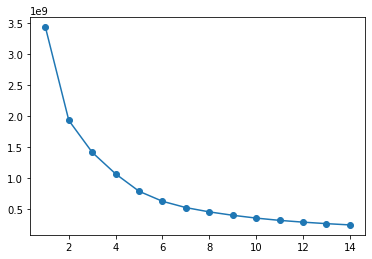

In [273]:
plt.plot(range(1,15),inertia_list)
plt.scatter(range(1,15),inertia_list)

In [274]:
m = []
for k in range(0, len(inertia_list)-1):
    m.append((inertia_list[k+1] - inertia_list[k])/inertia_list[k])

100*np.abs(m)

array([43.82241014, 26.73653573, 24.61215732, 26.3160938 , 20.56376985,
       16.34577207, 13.32767831, 12.05205629, 11.44645479, 10.4271535 ,
        9.07563475,  8.46438116,  7.84432781])

# Modelo KNN


In [276]:
from sklearn.neighbors import NearestNeighbors

#  nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)

In [278]:
y_knn = {};
for K in range(1, 3):
    knn_model = NearestNeighbors(n_neighbors=K, algorithm='ball_tree')
    knn_model.fit(X_train)
    y_knn[k] = knn_model.kneighbors(X_train)
    
    

AttributeError: 'NearestNeighbors' object has no attribute 'predict'

In [ ]:
plt.plot(range(1,15),inertia_knn)
plt.scatter(range(1,15),inertia_knn)

Esta función transforma el string en los diámetros a números con decimales

In [174]:
def trans_diam(diametros):
    values = [];
    
    for diam in diametros:
        diam = diam.split();
        if (len(diam)==2):
            p = diam[1].split('/');
            diametro = int(diam[0]) + int(p[0])/int(p[1])
        else: diametro = int(diam[0])
            
        values.append(diametro)
    return pd.Series(values, index=diametros.index)